## DA_Fall21_HW_1 Due at Mid-night 10/19/2021

### This homework will cover the following skills set
* Using sql 
* Checking for null values and outliers
* Calculate simple statistics using both SQL and Pandas 
* Calculate skew and correlation
* Basic Data Visualization
* How to fix missing values

## Late Policy: Take off 50% after one day, 80% after two days

**Make sure you have pandasql installed. If not, make sure you run the code in the following cell**

In [21]:
import os
try:
    import pandasql as ps
except:
    print("Failed in import pandasql")
    os.system("pip install pandasql")

**Import all standard libaries**

In [22]:
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Car Crashes dataset ##

In [23]:
crash = pd.read_csv("car_crashes2.csv")
print(crash.shape)
crash.head()

(54, 10)


,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state,region,division
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,South,East South Central
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,West,Pacific
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,West,Mountain
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,South,West South Central
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,West,Pacific


* accidents is the total number of crashes for each state
* speeding is the average speeding in each state

In [27]:
crash.describe()

,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,54.000000,53.000000,54.000000,54.000000,54.000000,53.000000,54.000000
mean,15.668519,5.028755,5.506778,13.545407,13.931500,908.318113,133.967407
std,4.087386,2.000479,5.157681,4.463259,3.730217,232.237787,24.703393
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.725000,3.774000,3.891000,10.345000,11.262000,768.950000,112.332500
50%,15.450000,4.608000,4.542000,13.816000,13.717000,861.180000,135.840000
75%,18.350000,6.510000,5.622000,16.215000,16.579000,1011.140000,152.065000
max,23.900000,9.450000,40.642000,23.661000,21.280000,2000.030000,194.780000


## Question 1. Check if there are any null or NA

In [28]:
crash.isnull().sum()

accidents         0
speeding          1
alcohol           0
not_distracted    0
no_previous       0
ins_premium       1
ins_losses        0
state             0
region            0
division          0
dtype: int64

## Question 2. Remove any rows that has null or NA

In [59]:
crash = crash.dropna()

# Sanity Check
print(crash.shape)

# print how many null values there are
crash.info()
crash.duplicated().sum()
crash.isnull().sum()

(52, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 52
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   accidents       52 non-null     float64
 1   speeding        52 non-null     float64
 2   alcohol         52 non-null     float64
 3   not_distracted  52 non-null     float64
 4   no_previous     52 non-null     float64
 5   ins_premium     52 non-null     float64
 6   ins_losses      52 non-null     float64
 7   state           52 non-null     object 
 8   region          52 non-null     object 
 9   division        52 non-null     object 
dtypes: float64(7), object(3)
memory usage: 4.5+ KB


accidents         0
speeding          0
alcohol           0
not_distracted    0
no_previous       0
ins_premium       0
ins_losses        0
state             0
region            0
division          0
dtype: int64

## Question 3. Check if there is any outliers in all numerical fields using both scatter and boxplot

In [15]:
crash.isnull().any()

accidents         False
speeding          False
alcohol           False
not_distracted    False
no_previous       False
ins_premium       False
ins_losses        False
state             False
region            False
division          False
dtype: bool

## Question 4. Display and Remove (the real) outliers

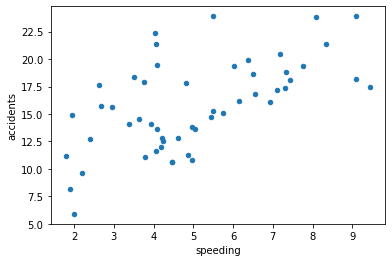

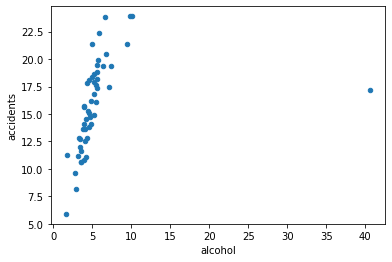

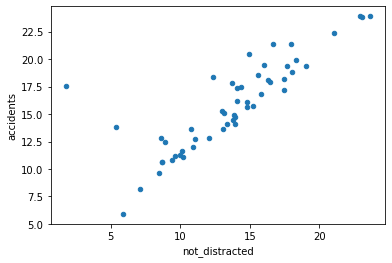

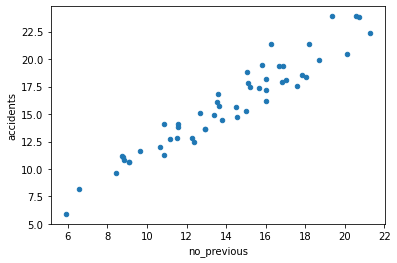

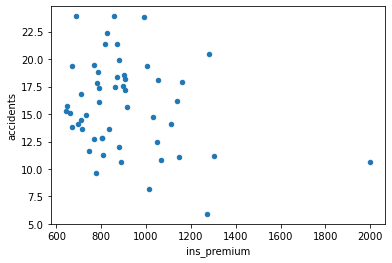

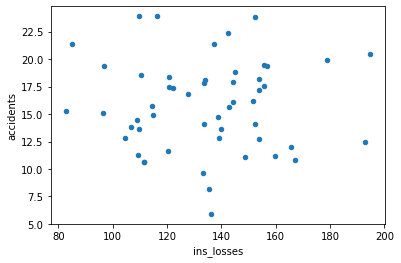

In [44]:
features = ['speeding','alcohol','not_distracted','no_previous','ins_premium','ins_losses']
for feature in features:
    crash.plot(kind='scatter',x=feature, y='accidents')

<AxesSubplot:xlabel='alcohol'>

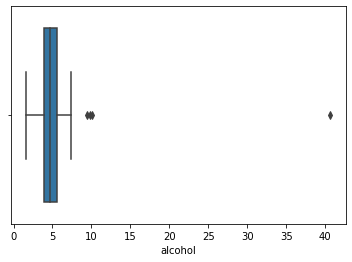

In [51]:
sns.boxplot(x=crash['alcohol'])

<AxesSubplot:ylabel='not_distracted'>

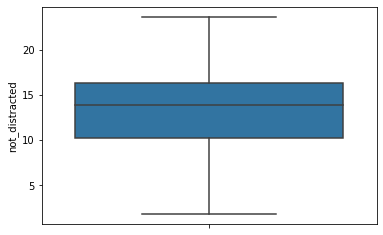

In [54]:
sns.boxplot(y='not_distracted',data=crash)

<AxesSubplot:ylabel='alcohol'>

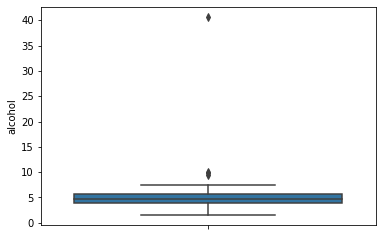

In [63]:
sns.boxplot(y='alcohol',data=crash)

In [78]:
crash.alcohol.describe()

count    52.000000
mean      5.573058
std       5.246151
min       1.593000
25%       3.897000
50%       4.629000
75%       5.640500
max      40.642000
Name: alcohol, dtype: float64

<AxesSubplot:xlabel='accidents', ylabel='alcohol'>

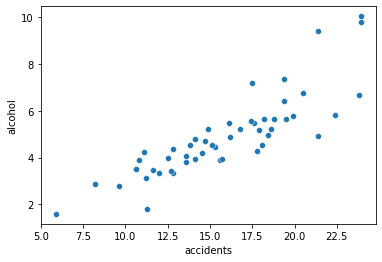

In [79]:
## LETS RMEMOVE THIS 40.642000 thats probably was inputted incorrectly
## Humans usually die around a BAC of .40 probably should've been inputted as .40 but got inputted as 40.6

crash = crash[ crash['alcohol']<=15]
sns.scatterplot(x='accidents', y='alcohol', data=crash)

<AxesSubplot:ylabel='ins_premium'>

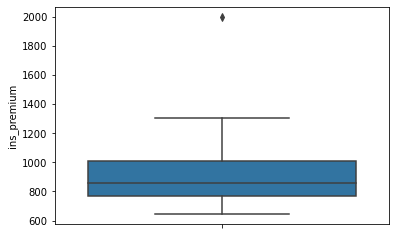

In [55]:
sns.boxplot(y='ins_premium',data=crash)

<AxesSubplot:xlabel='ins_premium'>

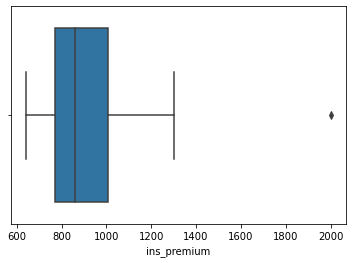

In [62]:
sns.boxplot(x=crash['ins_premium'])

In [80]:
##LETS Also remove this outlier, $2000 against acccidents should be a lot higher 
## How is this person paying $2000, and has yet to be 11 accidents
## could be because they are a young driver, and they have been in those 11 accidents 
## On the safe side of things I will not remove this outlier 
crash.ins_premium.describe()

count      51.000000
mean      901.971765
std       232.217917
min       641.960000
25%       768.430000
50%       858.970000
75%      1007.945000
max      2000.030000
Name: ins_premium, dtype: float64

In [98]:
## Lets pull that ins_premium with that max value to see the rest of the data for that entry
outlier_possibility= crash[ crash['ins_premium'] > 1500]
outlier_possibility

## this is looking like more of an outlier while the accidents are high, the rest of his values seem
## fairly in line with the median which makes me wonder why it is so high 
## lets remove it 

,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state,region,division
36,10.6,4.452,3.498,8.692,9.116,2000.03,111.62,WA,West,Pacific


<AxesSubplot:ylabel='ins_premium'>

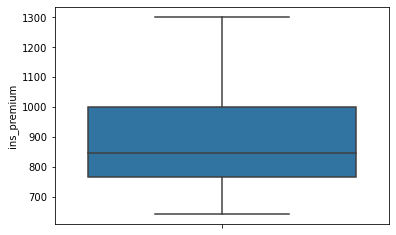

In [101]:
condition1 = 1500.00
## removal 
## DF = DF [ DF ['col_name'] < condition]
crash = crash[ crash ['ins_premium'] <= condition1] 
sns.boxplot(y=crash['ins_premium'])

<AxesSubplot:xlabel='ins_losses'>

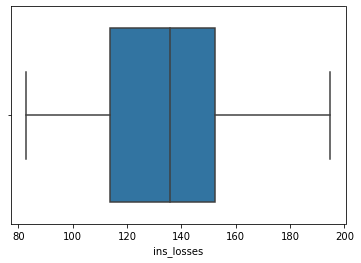

In [60]:
sns.boxplot(x=crash['ins_losses'])

<AxesSubplot:ylabel='ins_losses'>

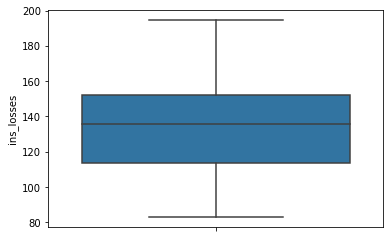

In [77]:
sns.boxplot(data=crash, y='ins_losses')

<AxesSubplot:xlabel='speeding'>

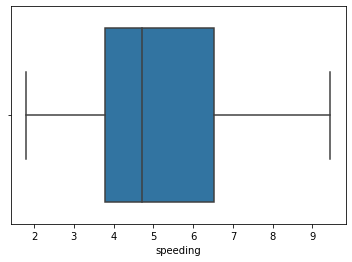

In [61]:
sns.boxplot(x=crash['speeding'])

<AxesSubplot:ylabel='speeding'>

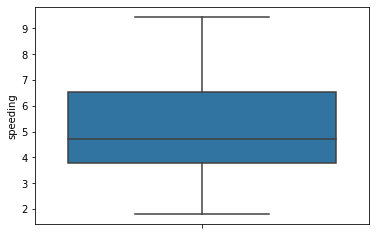

In [64]:
sns.boxplot(y='speeding',data=crash)

## Question 5. Calculate the average speeding in usa and Northeast region using SQL

In [110]:
try:
    import pandasql as ps
except:
    os.system("pip install pandasql")

In [117]:
sql = "select avg(speeding) as average_speed from crash where region='Northeast' and state!='territory'"
average_speed = ps.sqldf(sql)
average_speed

,average_speed
0,4.42475


## Question 6. Calculate the average alcohol for each region using SQL

In [118]:
sql1 = "select avg(alcohol) as average_alcohol from crash group by region"
average_alcohol = ps.sqldf(sql1)
average_alcohol

,average_alcohol
0,4.996917
1,3.980500
2,5.414647
3,4.754077


## Question 7. Calculate the number of occurrences, mean, min, max of the speeding for each divison using SQL

In [121]:
sql2 = "select count(speeding) as speeding_occurences, avg(speeding) as average_speed, min(speeding) as min_speed, max(speeding) as max_speed from crash"
speeding_description = ps.sqldf(sql2)
speeding_description

,speeding_occurences,average_speed,min_speed,max_speed
0,50,5.01944,1.792,9.45


## Question 8. Answer Question 7 but use Pandas functions

In [159]:
print('Count:{}\nAverage_Speed:{}\nMin_Speed:{}\nMax_Speed:{}'.format(round(crash.speeding.count(),4), round(crash.speeding.mean(),4), round(crash.speeding.min(),4),round(crash.speeding.max(),4)))

Count:50
Average_Speed:5.0194
Min_Speed:1.792
Max_Speed:9.45


## Question 9. Calculate the Standard deviation, Skew and Kurtosis for the accidents, speeding, alcohol for each region

In [165]:
alcohol_df = crash.groupby('region')['alcohol'].describe()
alcohol_sd = crash.groupby('region')['alcohol'].std()
alcohol_skew = crash.groupby('region')['alcohol'].skew()
alcohol_kurt = crash.groupby('region')['alcohol'].apply(pd.DataFrame.kurtosis)
print(f'SD:{alcohol_sd}\n\nSKEW:{alcohol_skew}\n\nKURT:{alcohol_kurt}')

SD:region
Midwest      1.824432
Northeast    0.872950
South        1.773576
West         1.910356
Name: alcohol, dtype: float64

SKEW:region
Midwest      2.093467
Northeast    0.764250
South        0.330988
West         1.159752
Name: alcohol, dtype: float64

KURT:region
Midwest      5.597372
Northeast    0.890501
South        2.125568
West         2.219220
Name: alcohol, dtype: float64


In [167]:
speeding_df = crash.groupby('region')['speeding'].describe()
speeding_sd = crash.groupby('region')['speeding'].std()
speeding_skew = crash.groupby('region')['speeding'].skew()
speeding_kurt = crash.groupby('region')['speeding'].apply(pd.DataFrame.kurtosis)
print(f'SD:{speeding_sd}\n\nSKEW:{speeding_skew}\n\nKURT:{speeding_kurt}')

SD:region
Midwest      1.537451
Northeast    2.327773
South        2.220711
West         1.803138
Name: speeding, dtype: float64

SKEW:region
Midwest      0.121197
Northeast    1.051666
South        0.172035
West         0.697441
Name: speeding, dtype: float64

KURT:region
Midwest     -0.737061
Northeast    1.763520
South       -1.327699
West        -0.465455
Name: speeding, dtype: float64


In [168]:
accidents_df = crash.groupby('region')['accidents'].describe()
accidents_sd = crash.groupby('region')['accidents'].std()
accidents_skew = crash.groupby('region')['accidents'].skew()
accidents_kurt = crash.groupby('region')['accidents'].apply(pd.DataFrame.kurtosis)
print(f'SD:{accidents_sd}\n\nSKEW:{accidents_skew}\n\nKURT:{accidents_kurt}')

SD:region
Midwest      3.588988
Northeast    3.077453
South        4.537037
West         3.325118
Name: accidents, dtype: float64

SKEW:region
Midwest      0.950845
Northeast    0.777587
South       -1.125839
West         0.064819
Name: accidents, dtype: float64

KURT:region
Midwest      2.067092
Northeast    0.726713
South        1.860064
West        -1.048692
Name: accidents, dtype: float64


## Question 10. Plot the histogram of accidents distribution for different region using 5 bins

region
Midwest      AxesSubplot(0.125,0.125;0.775x0.755)
Northeast    AxesSubplot(0.125,0.125;0.775x0.755)
South        AxesSubplot(0.125,0.125;0.775x0.755)
West         AxesSubplot(0.125,0.125;0.775x0.755)
Name: accidents, dtype: object

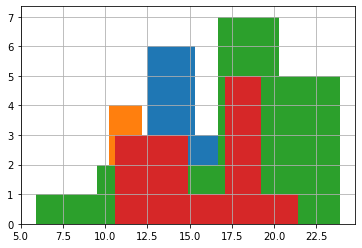

In [174]:
variable_accidents_df=crash.groupby('region')['accidents']
variable_accidents_df.hist(bins=5)

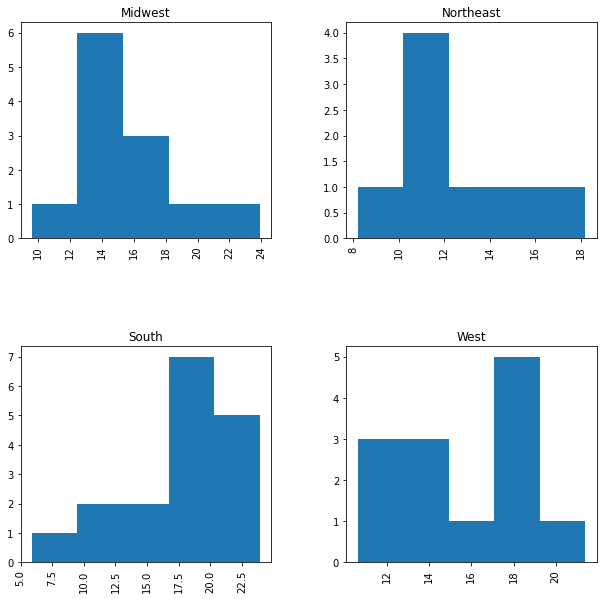

In [177]:
model_accidents_by_region = crash['accidents'].hist(by=crash['region'],bins=5, figsize=(10,10))

## Question 11. How would you describe the accidents distribution for different region based on the Skew and Kurotsis?
(i.e. who has positive and negative skew and who has positive and negative Kurotsis)

In [197]:
list1= variable_accidents_df.apply(pd.DataFrame.kurtosis)
list2= skew_accidents_by_region = variable_accidents_df.skew()
list1_elements = []
list2_elements = []

for element in list1:
    list1_elements.append(element)
    
for element in list2:
    list2_elements.append(element)
    
print('MIDWEST_SKEW:{}\n\nNORTHEAST_SKEW:{}\n\nSOUTH_SKEW:{}\n\nWEST_SKEW:{}'.format(list2_elements[0],list2_elements[1],list2_elements[2],list2_elements[3]))    
print('\n\n')
print('MIDWEST_KURT:{}\n\nNORTHEAST_KURT:{}\n\nSOUTH_KURT:{}\n\nWEST_KURT:{}'.format(list1_elements[0],list1_elements[1],list1_elements[2],list1_elements[3]))

MIDWEST_SKEW:0.9508451227862821

NORTHEAST_SKEW:0.7775866065677681

SOUTH_SKEW:-1.1258391946859427

WEST_SKEW:0.06481850368199978



MIDWEST_KURT:2.0670921690995625

NORTHEAST_KURT:0.7267132014961879

SOUTH_KURT:1.86006396644026

WEST_KURT:-1.0486917245029392


## Question 12. Calculate correlation of all the factors among themselves and determine which factors among speeding, alcohol or ins_premium will affect accidents the most?

In [236]:
selected_feature_1 = ['speeding']
selected_feature_2 = ['alcohol']
selected_feature_3 = ['ins_premium']
crash.groupby(['accidents'])[selected_feature_1].mean()

,speeding
accidents,
5.9,2.0060
8.2,1.8860
9.6,2.2080
10.6,4.4520
10.8,4.9680
11.1,3.7740
11.2,1.7920
11.3,4.8590
11.6,4.0600


In [237]:
crash.groupby(['accidents'])[selected_feature_2].mean()


,alcohol
accidents,
5.9,1.5930
8.2,2.8700
9.6,2.7840
10.6,3.4980
10.8,3.8880
11.1,4.2180
11.2,3.1360
11.3,1.8080
11.6,3.4800


In [238]:
crash.groupby(['accidents'])[selected_feature_3].mean()

,ins_premium
accidents,
5.9,1273.89
8.2,1011.14
9.6,777.18
10.6,890.03
10.8,1068.73
11.1,1148.99
11.2,1301.52
11.3,809.38
11.6,746.54


In [270]:
crash.columns
all_features_tested = ['alcohol','ins_premium','speeding','accidents']

In [271]:
new_df = crash[all_features_tested]

In [272]:
new_df.corr()

,alcohol,ins_premium,speeding,accidents
alcohol,1.000000,-0.146921,0.667377,0.850706
ins_premium,-0.146921,1.000000,-0.059254,-0.174157
speeding,0.667377,-0.059254,1.000000,0.608632
accidents,0.850706,-0.174157,0.608632,1.000000


In [273]:
max(new_df.corr())

'speeding'

In [274]:
min(new_df.corr())

'accidents'

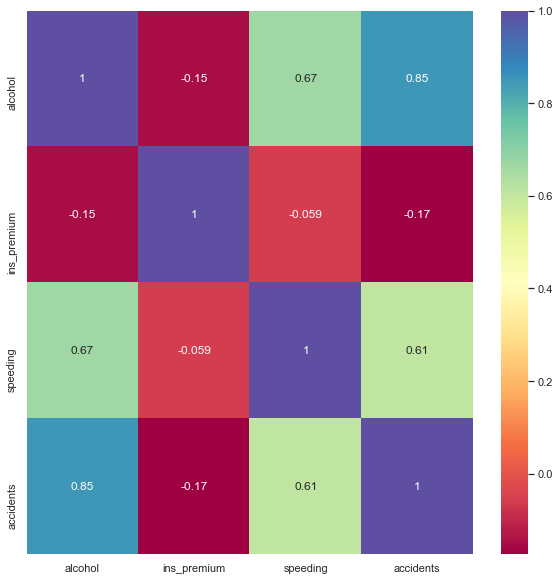

In [275]:
heatmap_plot = sns.set(rc={"figure.figsize":(10,10)})
heatmap_plot = sns.heatmap(new_df.corr(), annot=True, cmap='Spectral')

### Now Load a different dataset (MPG dataset number 3)

In [267]:
mpg = pd.read_csv("mpg3.csv")
print(mpg.shape)
mpg.head()

(405, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,usa,ford torino


# Question 13: Check to see if there are any missing values. Fix the missing values by imputing value from the mean.

### Type your code to fix the missing values by imputing value from the mean

In [276]:
mpg.isnull().any()

mpg              True
cylinders       False
displacement    False
horsepower       True
weight           True
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

In [277]:
mpg.isnull().sum()

mpg             1
cylinders       0
displacement    0
horsepower      6
weight          1
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [278]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           404 non-null    float64
 1   cylinders     405 non-null    int64  
 2   displacement  405 non-null    float64
 3   horsepower    399 non-null    float64
 4   weight        404 non-null    float64
 5   acceleration  405 non-null    float64
 6   model_year    405 non-null    int64  
 7   origin        405 non-null    object 
 8   name          405 non-null    object 
dtypes: float64(5), int64(2), object(2)
memory usage: 28.6+ KB


In [283]:
mpg_mean = mpg['mpg'].mean()

In [287]:
horsepower_mean = mpg['horsepower'].mean()

In [288]:
weight_mean = mpg['weight'].mean()

In [289]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,404.000000,405.000000,405.000000,399.000000,404.000000,405.000000,405.000000
mean,23.645545,5.493827,194.504938,105.593985,3020.866337,15.521481,75.987654
std,8.465607,1.847687,105.231828,42.317959,1282.513294,2.792380,3.746595
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,76.000000,2227.500000,13.800000,73.000000
50%,23.000000,4.000000,151.000000,95.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,267.000000,129.000000,3614.750000,17.100000,79.000000
max,90.000000,20.000000,455.000000,450.000000,22340.000000,24.800000,85.000000


In [290]:
var1 = 'mpg'
var2 = 'horsepower'
var3 = 'weight'
new_mpg = mpg[var1].fillna(mpg_mean)
new_horsepower = mpg[var2].fillna(horsepower_mean)
new_weight = mpg[var3].fillna(weight_mean)

In [292]:
new_mpg.isnull().sum()

0

In [293]:
new_horsepower.isnull().sum()

0

In [294]:
new_weight.isnull().sum()

0

In [296]:
mpg[var1] = new_mpg
print(mpg.describe())
mpg.isnull().any()

              mpg   cylinders  displacement  horsepower        weight  \
count  405.000000  405.000000    405.000000  399.000000    404.000000   
mean    23.645545    5.493827    194.504938  105.593985   3020.866337   
std      8.455124    1.847687    105.231828   42.317959   1282.513294   
min      9.000000    3.000000     68.000000   46.000000   1613.000000   
25%     17.000000    4.000000    105.000000   76.000000   2227.500000   
50%     23.000000    4.000000    151.000000   95.000000   2803.500000   
75%     29.000000    8.000000    267.000000  129.000000   3614.750000   
max     90.000000   20.000000    455.000000  450.000000  22340.000000   

       acceleration  model_year  
count    405.000000  405.000000  
mean      15.521481   75.987654  
std        2.792380    3.746595  
min        8.000000   70.000000  
25%       13.800000   73.000000  
50%       15.500000   76.000000  
75%       17.100000   79.000000  
max       24.800000   85.000000  


mpg             False
cylinders       False
displacement    False
horsepower       True
weight           True
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

In [297]:
mpg[var2] = new_horsepower
print(mpg.describe())
mpg.isnull().any()

              mpg   cylinders  displacement  horsepower        weight  \
count  405.000000  405.000000    405.000000  405.000000    404.000000   
mean    23.645545    5.493827    194.504938  105.593985   3020.866337   
std      8.455124    1.847687    105.231828   42.002541   1282.513294   
min      9.000000    3.000000     68.000000   46.000000   1613.000000   
25%     17.000000    4.000000    105.000000   76.000000   2227.500000   
50%     23.000000    4.000000    151.000000   95.000000   2803.500000   
75%     29.000000    8.000000    267.000000  125.000000   3614.750000   
max     90.000000   20.000000    455.000000  450.000000  22340.000000   

       acceleration  model_year  
count    405.000000  405.000000  
mean      15.521481   75.987654  
std        2.792380    3.746595  
min        8.000000   70.000000  
25%       13.800000   73.000000  
50%       15.500000   76.000000  
75%       17.100000   79.000000  
max       24.800000   85.000000  


mpg             False
cylinders       False
displacement    False
horsepower      False
weight           True
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

In [298]:
mpg[var3] = new_weight
print(new_weight.describe())
mpg.isnull().any()

count      405.000000
mean      3020.866337
std       1280.925042
min       1613.000000
25%       2228.000000
50%       2807.000000
75%       3613.000000
max      22340.000000
Name: weight, dtype: float64


mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

In [299]:
mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64